In [1]:
using Random
using Distributions
using Plots

Random.seed!(1234);
gr();

In [2]:
include("../feature/feature.jl");

In [3]:
function create_toy_data(func, sample_size, std)
    x = collect(reshape(range(0, stop=1.0, length=sample_size),sample_size));
    noise = rand(Normal(0.0, std), sample_size);
    return x, func(x) + noise
end

function sinusoidal(x)
    return sin.(2 * pi * x)
end

sinusoidal (generic function with 1 method)

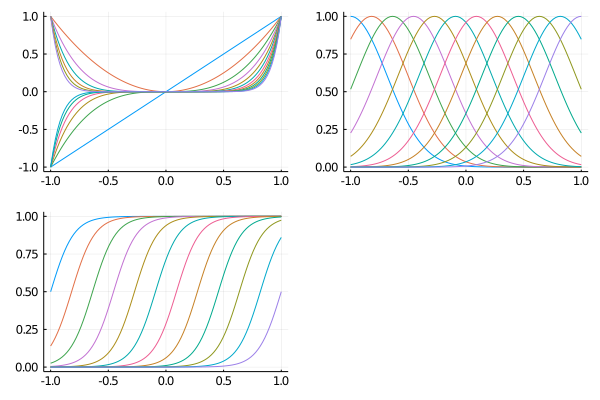

In [4]:
x = collect(reshape(range(-1.0, stop=1.0, length=100), 100));
means = collect(reshape(range(-1.0, stop=1.0, length=12), 12));
feature_poly = PolynomialFeature(11);
feature_gauss = GaussianFeature(means, 0.1);
feature_sigmoid = SigmoidalFeature(means, 10.0);

X_polynomial = transform(feature_poly, x);
X_gaussian = transform(feature_gauss, x);
X_sigmoidal = transform(feature_sigmoid, x);

plots = [];
# polynomial
p = plot();
for j in 1:12
    p = plot!(x, X_polynomial[j, :]);
end
push!(plots, p);
# gaussian
p = plot();
for j in 1:12
    p = plot!(x, X_gaussian[j, :]);
end
push!(plots, p);
# sigmoidal
p = plot();
for j in 1:12
    p = plot!(x, X_sigmoidal[j, :]);
end
push!(plots, p);

plot(plots[1], plots[2], plots[3], legend=nothing)